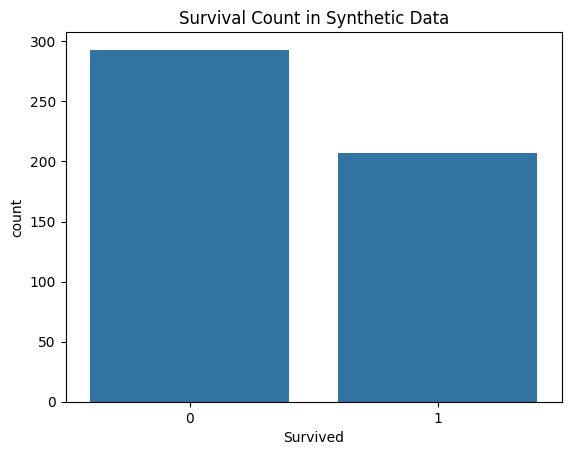

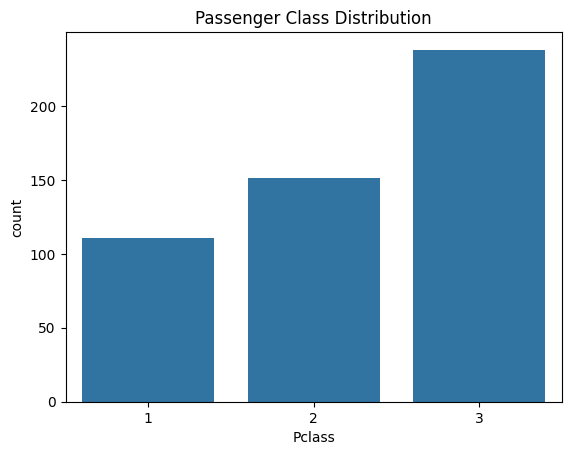

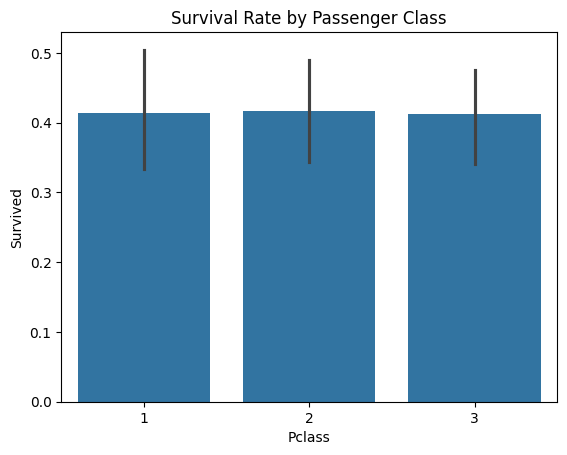

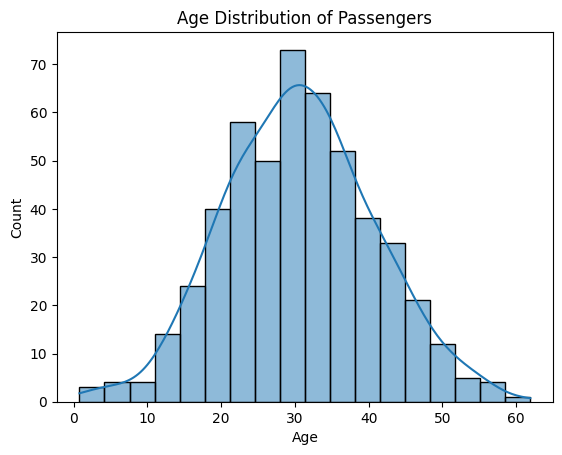

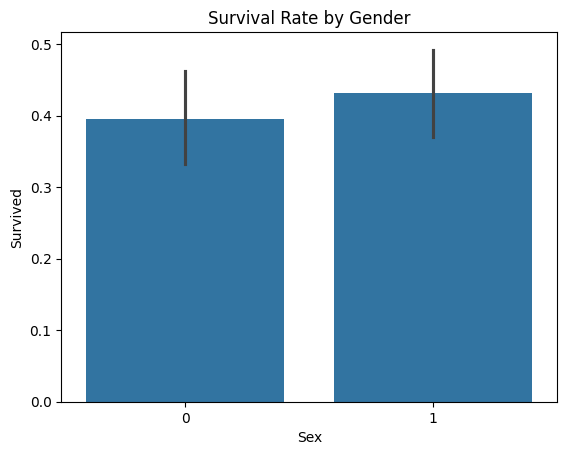

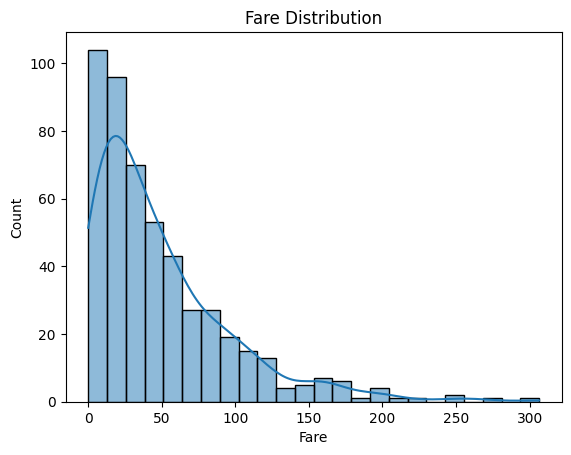

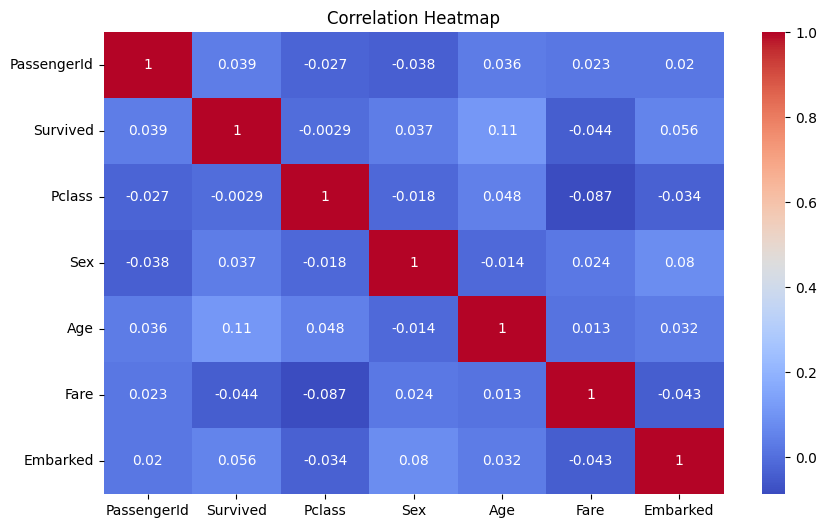

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.414000,2.254000,0.524000,30.599750,48.836040,1.278000
std,144.481833,0.493042,0.796714,0.499924,10.165879,47.391463,0.909048
min,1.000000,0.000000,1.000000,0.000000,0.786495,0.006735,0.000000
25%,125.750000,0.000000,2.000000,0.000000,23.472588,16.193323,0.000000
50%,250.500000,0.000000,2.000000,1.000000,30.422016,34.062243,2.000000
75%,375.250000,1.000000,3.000000,1.000000,37.108198,67.638772,2.000000
max,500.000000,1.000000,3.000000,1.000000,61.931076,306.441150,2.000000


In [13]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seed for reproducibility
np.random.seed(42)

def analyze_survival(df):
    """
    Analyze survival rates in the Titanic dataset across various categories.

    This function calculates the overall survival rate and breaks it down by
    passenger class, sex, and age group. It provides insights into which factors
    may have influenced survival rates on the Titanic.

    Parameters:
    df (pandas.DataFrame): The Titanic dataset to analyze. Expected columns:
        - 'Survived': Binary indicator of survival (1 for survived, 0 for not survived)
        - 'Pclass': Passenger class (1, 2, or 3)
        - 'Sex': Passenger's sex
        - 'Age': Passenger's age

    Returns:
    pandas.DataFrame: A DataFrame containing survival rates for different categories:
        - Overall survival rate
        - Survival rates by passenger class
        - Survival rates by sex
        - Survival rates by age group

    Example:
    >>> df = pd.read_csv('titanic_data.csv')
    >>> survival_analysis = analyze_survival(df)
    >>> print(survival_analysis)
    """

# Creating a synthetic dataset with similar structure to Titanic dataset
n = 500  # Number of rows

data = {
    'PassengerId': np.arange(1, n+1),
    'Survived': np.random.choice([0, 1], size=n, p=[0.6, 0.4]),  # 40% survival rate
    'Pclass': np.random.choice([1, 2, 3], size=n, p=[0.2, 0.3, 0.5]),  # Class distribution
    'Sex': np.random.choice(['male', 'female'], size=n, p=[0.5, 0.5]),  # Equal gender distribution
    'Age': np.random.normal(loc=30, scale=10, size=n),  # Age distribution (mean 30, std 10)
    'Fare': np.random.exponential(scale=50, size=n),  # Exponentially distributed fares
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=n, p=[0.3, 0.1, 0.6])  # Port of embarkation
}

df = pd.DataFrame(data)

df['Age'] = df['Age'].clip(lower=0)

# Convert 'Sex' and 'Embarked' columns to numeric before correlation
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Plot 1: Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count in Synthetic Data')
plt.show()

# Plot 2: Passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Plot 3: Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Plot 4: Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

# Plot 5: Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Plot 6: Fare distribution
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Show summary statistics
df.describe()
